In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Colab Notebooks/CAP 6415 Computer Vision Online/data/'
!ls "$data_dir"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 apple.jpg	     assignment_2.jpg				 Fig3_4a.jpg
'Armes 1.png'	     assignment_3.jpg				 Fig3_4c.jpg
 assignment_10.jpg   assignment_4.jpg				 house_1.png
 assignment_11.jpg   assignment_5.jpg				 house_2.png
 assignment_12.jpg   assignment_6.jpg				 lizard.jpg
 assignment_13.jpg   assignment_7.jpg				 solution1.png
 assignment_14.jpg   assignment_8.jpg				 solution2.png
 assignment_15.jpg   assignment_9.jpg				 solution3.png
 assignment_16.jpg   declaration_of_independence_stone_630.jpg
 assignment_1.jpg    Fig3_3a.jpg


In [2]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import scipy.ndimage as scimage
import torch.nn as nn
from skimage import io
from skimage.feature import peak_local_max
#!pip install opencv-contrib-python==4.4.0.44
import cv2
print (cv2 .__version__)

np.set_printoptions(precision=2, suppress=True)

4.8.0


In [3]:
# Load 16 images
images = []
for i in range (16) :
    image_x = cv2.imread(data_dir + 'assignment_'+ str(i+1)+'.jpg')
    image_x = cv2.cvtColor(image_x, cv2.COLOR_BGR2GRAY)

    # Resize height
    height = 400
    (h, w) = image_x.shape[:2]
    r = height / float(h)
    dim = (int(w * r), height)
    image_x = cv2.resize(image_x, dim, interpolation = cv2.INTER_AREA)

    images.append(image_x)


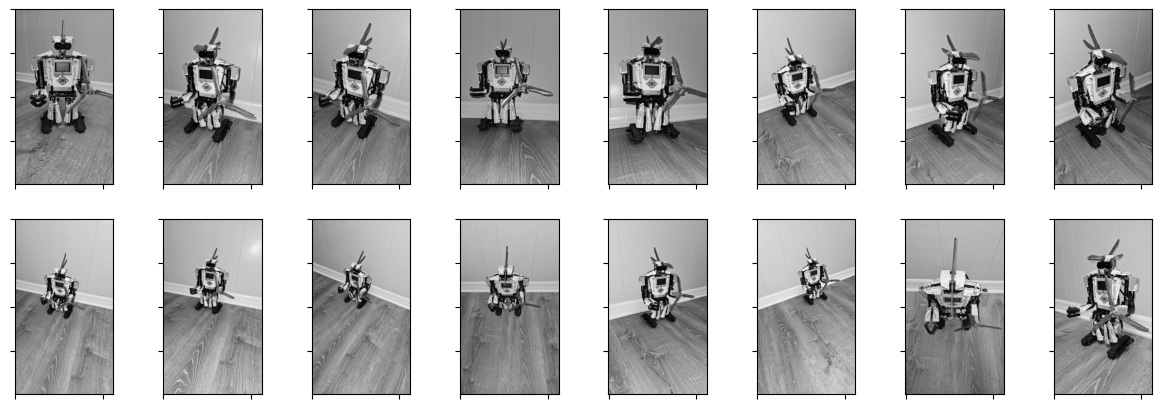

In [4]:
# Show 16 images
fig, ax = plt.subplots(nrows=2, ncols=8)
fig.set_size_inches (15, 5)

for i in range (16) :
    if i < 8:
        ax[0,i].imshow(images[i], 'gray')
        ax[0,i].xaxis.set_major_formatter(plt.NullFormatter())
        ax[0,i].yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax[1,i-8].imshow(images[i], 'gray')
        ax[1,i-8].xaxis.set_major_formatter(plt.NullFormatter())
        ax[1,i-8].yaxis.set_major_formatter(plt.NullFormatter())

In [5]:
# Open SIFT
sift = cv2.SIFT_create()

keypoints =[]
descriptors = []
for i in range (16) :
    keypoints_x, descriptors_x = sift.detectAndCompute(images[i], None)
    keypoints.append(keypoints_x)
    descriptors.append(descriptors_x)

In [6]:
# FEATURE MATCHING
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

In [7]:
# draw the detected key points for display purposes
sift_images = []
for i in range (16) :
    sift_image_x = cv2.drawKeypoints(images[i], keypoints[1], images[1], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    sift_images.append(sift_image_x)


Text(0.5, 1.0, 'SIFT features')

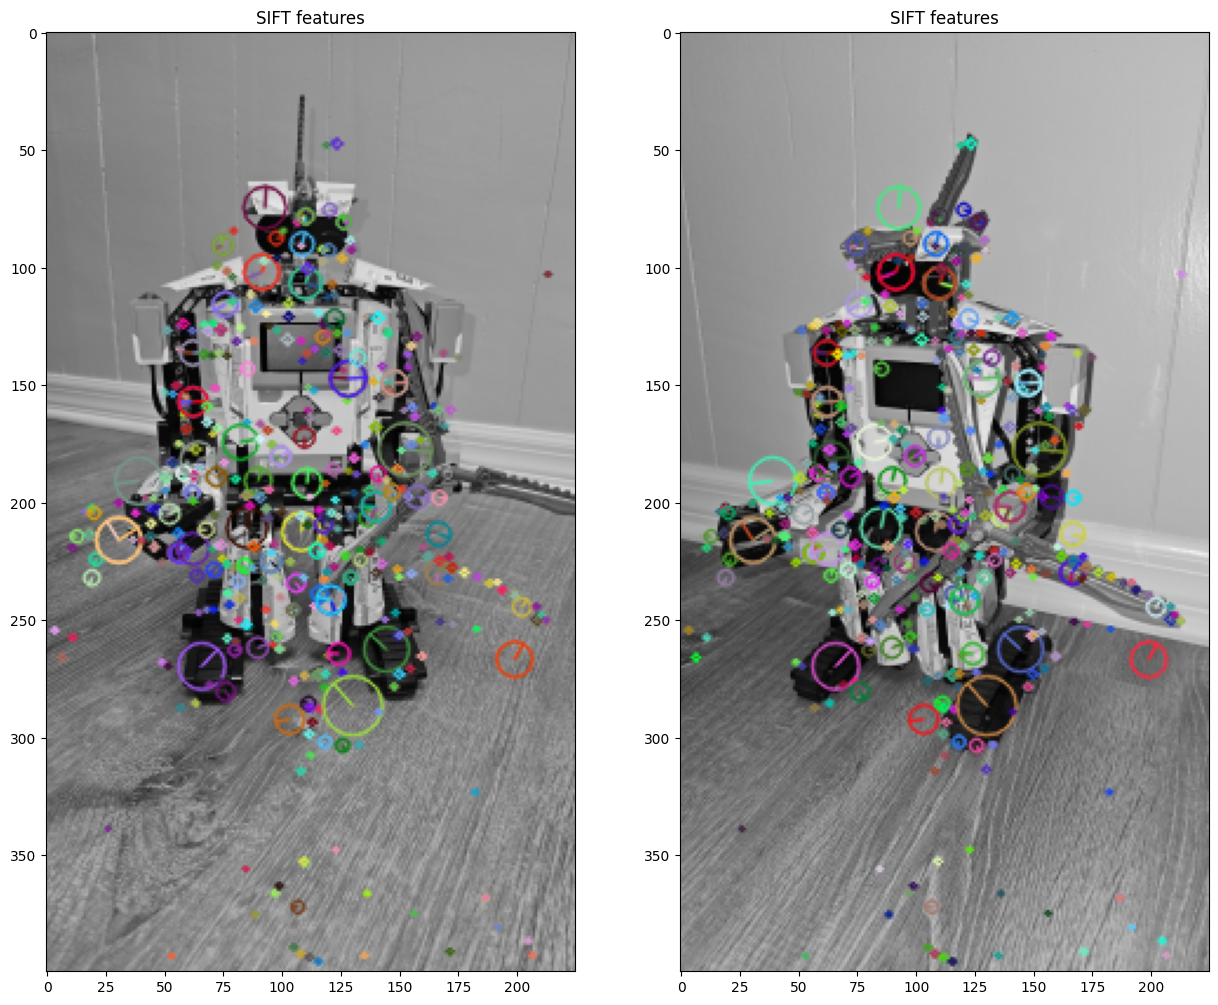

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches (15, 20)

ax[0].imshow(sift_images[0])
ax[0].set_title('SIFT features')
ax[1].imshow(sift_images[1])
ax[1].set_title('SIFT features')

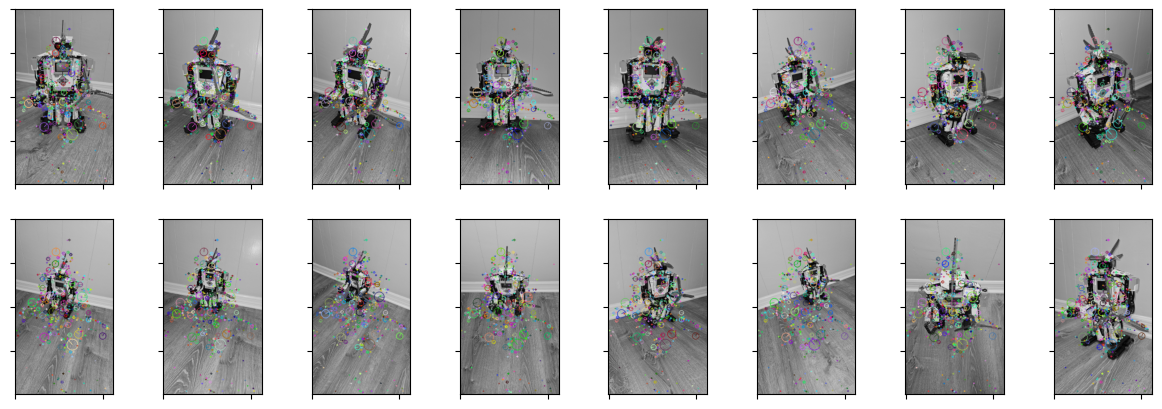

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=8)
fig.set_size_inches (15, 5)

for i in range (16) :
    if i < 8:
        ax[0,i].imshow(sift_images[i])
        ax[0,i].xaxis.set_major_formatter(plt.NullFormatter())
        ax[0,i].yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax[1,i-8].imshow(sift_images[i])
        ax[1,i-8].xaxis.set_major_formatter(plt.NullFormatter())
        ax[1,i-8].yaxis.set_major_formatter(plt.NullFormatter())

In [11]:
matches_among_images = []
# Match image 1 with the rest of the 15 images
for i in range (15) :
    matches = bf.match(descriptors[0], descriptors[i+1])
    matches = sorted(matches, key = lambda x:x.distance)
    # draw matches
    match_image = cv2.drawMatches(images[0], keypoints[0], images[i+1], keypoints[i+1], matches[:20], images[i+1], flags=2)
    matches_among_images.append(match_image)

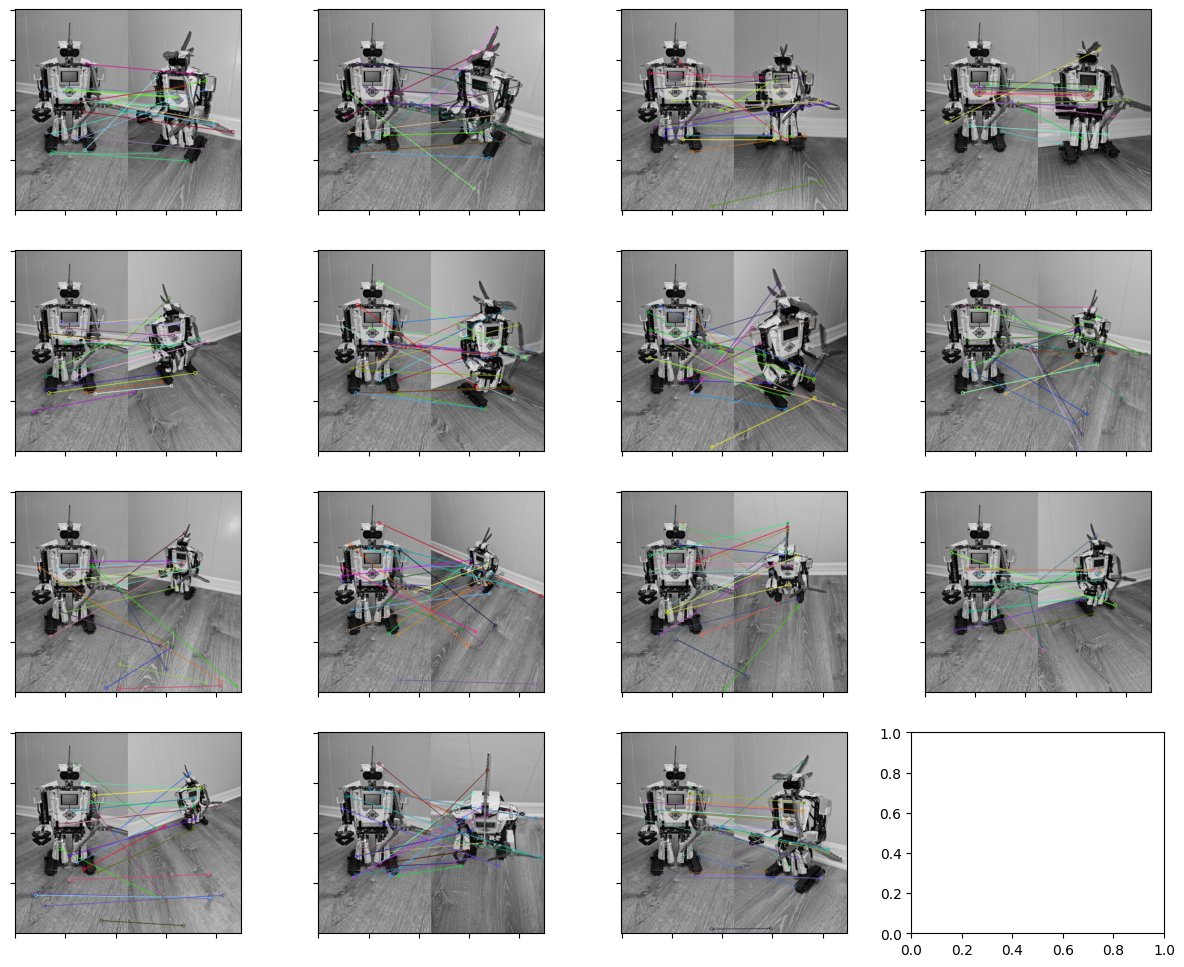

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=4)
fig.set_size_inches (15, 12)

for i in range (15) :
    if i < 4:
        ax[0,i].imshow(matches_among_images[i])
        ax[0,i].xaxis.set_major_formatter(plt.NullFormatter())
        ax[0,i].yaxis.set_major_formatter(plt.NullFormatter())
    elif i < 8:
        ax[1,i-4].imshow(matches_among_images[i])
        ax[1,i-4].xaxis.set_major_formatter(plt.NullFormatter())
        ax[1,i-4].yaxis.set_major_formatter(plt.NullFormatter())
    elif i < 12:
        ax[2,i-8].imshow(matches_among_images[i])
        ax[2,i-8].xaxis.set_major_formatter(plt.NullFormatter())
        ax[2,i-8].yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax[3,i-12].imshow(matches_among_images[i])
        ax[3,i-12].xaxis.set_major_formatter(plt.NullFormatter())
        ax[3,i-12].yaxis.set_major_formatter(plt.NullFormatter())


# Effectiveness of the feature detector

The feature detector was able to detect most of the features when the object does not change much of the angle nor the size in the image.

We can see here that the features and keypoints were detected and able to extrapolate the points to the next image

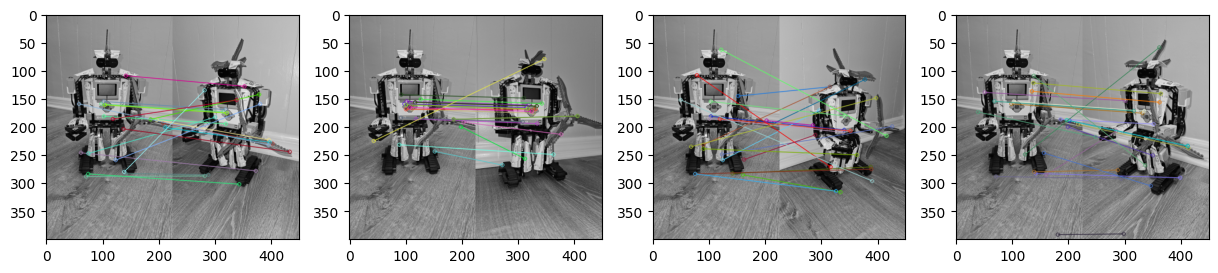

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches (15, 12)

ax[0].imshow(matches_among_images[0])
ax[1].imshow(matches_among_images[3])
ax[2].imshow(matches_among_images[5])
ax[3].imshow(matches_among_images[14])


Nevertheless, when the pictures show the object in a very different way, the design of the flooring made the algorithm to identify features that were not relevant for us but in terms of colors and shapes were very relevant for the algorithm.

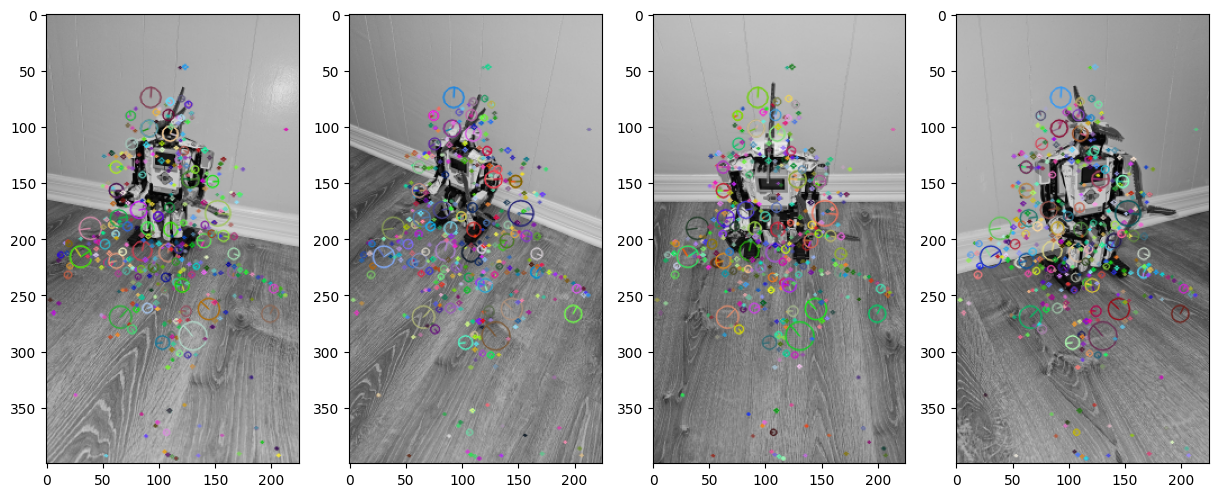

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches (15, 12)

ax[0].imshow(sift_images[9])
ax[1].imshow(sift_images[10])
ax[2].imshow(sift_images[11])
ax[3].imshow(sift_images[12])

As a result, the shapes and color from the floor were tried to be found and match in different pictures

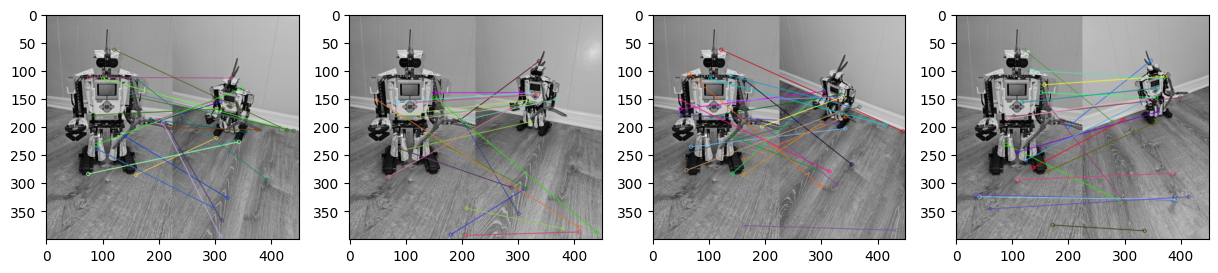

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches (15, 12)

ax[0].imshow(matches_among_images[7])
ax[1].imshow(matches_among_images[8])
ax[2].imshow(matches_among_images[9])
ax[3].imshow(matches_among_images[12])